In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline


df = pd.read_csv('./records-for-2012.csv', index_col=0)
df.head()

,Create Time,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time,Location 1,Zip Codes
Agency,,,,,,,,,,
OP,2012-01-01T00:00:25.000,2.0,32Y,2.0,415GS,415 GUNSHOTS,LOP120101000004,2012-01-01T00:40:27.000,"{'human_address': '{""address"": ""OLIVE ST"", ""ci...",NaN
OP,2012-01-01T00:00:27.000,2.0,30Y,2.0,415GS,415 GUNSHOTS,LOP120101000003,2012-01-01T01:34:31.000,"{'human_address': '{""address"": ""AV&MACARTHUR B...",NaN
OP,2012-01-01T00:00:48.000,1.0,06X,2.0,949,SUSPICIOUS VEHICLE,LOP120101000005,2012-01-01T01:18:38.000,"{'human_address': '{""address"": ""SYCAMORE ST"", ...",NaN
OP,2012-01-01T00:00:58.000,2.0,35X,2.0,415GS,415 GUNSHOTS,LOP120101000008,2012-01-01T02:37:00.000,"{'human_address': '{""address"": ""AV&MACARTHUR B...",NaN
OP,2012-01-01T00:01:14.000,1.0,02Y,2.0,415GS,415 GUNSHOTS,LOP120101000007,2012-01-01T02:12:39.000,"{'human_address': '{""address"": ""ST&WOOD ST"", ""...",NaN


数据摘要 设置：标称属性Nominal properties和数值属性Numeric properties 标称属性里给出每个可能取值的频数

In [2]:
nominal_properties = df.select_dtypes(exclude=np.number).columns.values
print('Nominal properties为:', nominal_properties)
for name in nominal_properties:
    print(df.groupby(name).size())

Nominal properties为: ['Create Time' 'Beat' 'Incident Type Id' 'Incident Type Description'
 'Event Number' 'Closed Time' 'Location 1']
Create Time
2012-01-01T00:00:25.000    1
2012-01-01T00:00:27.000    1
2012-01-01T00:00:48.000    1
2012-01-01T00:00:58.000    1
2012-01-01T00:01:14.000    1
                          ..
2012-12-31T23:50:57.000    1
2012-12-31T23:51:39.000    1
2012-12-31T23:57:22.000    1
2012-12-31T23:57:28.000    1
2012-12-31T23:57:50.000    1
Length: 186801, dtype: int64
Beat
01X     2193
02X     2798
02Y     3043
03X     4380
03Y     3009
04X     8088
05X     2681
05Y      836
06X     4676
07X     4235
08X     6691
09X     3845
10X     2961
10Y     2727
11X     2165
12X     2491
12Y     3344
13X     1212
13Y     1898
13Z     2946
14X     3070
14Y     1578
15X     2671
16X     1197
16Y     1680
17X     2127
17Y     2635
18X     1224
18Y     1816
19X     5158
20X     4682
21X     2674
21Y     3822
22X     3131
22Y     2725
23X     5301
24X     2483
24Y     2723
25X    

数值属性，给出5数概括及缺失值的个数

In [3]:
numeric_properties = df.select_dtypes(include=np.number).columns.values
print('Numeric properties为:', numeric_properties)
describe = df.describe()
total = len(df)
data = {}
for field in describe.columns:
    data[field] = total - describe[field]['count']

describe = describe.append(pd.Series(data, name='miss'))
describe

Numeric properties为: ['Area Id' 'Priority' 'Zip Codes']


,Area Id,Priority,Zip Codes
count,186016.000000,187430.000000,175.000000
mean,1.456751,1.776311,13430.194286
std,0.498127,0.416717,9517.723061
min,1.000000,1.000000,170.000000
25%,1.000000,2.000000,4547.000000
50%,1.000000,2.000000,13025.000000
75%,2.000000,2.000000,20663.500000
max,2.000000,2.000000,33120.000000
miss,1415.000000,1.000000,187256.000000


数据可视化 1.绘制用直方图 由图Priority不符合正态分布

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D1D345668>,
      dtype=object)

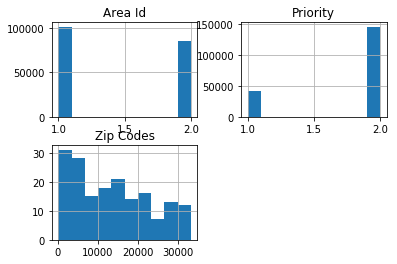

In [4]:
df.hist()

2.绘制盒图

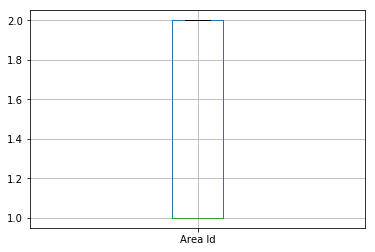

In [5]:
df.boxplot('Area Id')

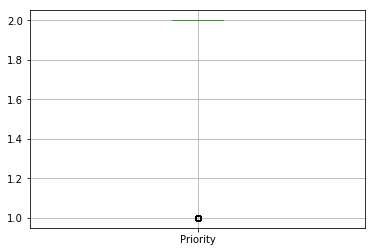

In [6]:
df.boxplot('Priority')

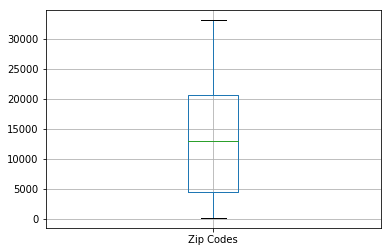

In [7]:
df.boxplot('Zip Codes')

数据缺失的处理
观察数据集中缺失的数据

In [8]:
total = len(df)
data = {'counts': {}, 'percent': {}}
for field in df.columns:
    data['counts'][field] = total - df[field].count()
    data['percent'][field] = (total - df[field].count())/total
pd.DataFrame(data)

,counts,percent
Area Id,1415,0.007549
Beat,984,0.005250
Closed Time,19,0.000101
Create Time,1,0.000005
Event Number,1,0.000005
Incident Type Description,1,0.000005
Incident Type Id,1,0.000005
Location 1,70,0.000373
Priority,1,0.000005
Zip Codes,187256,0.999066


缺失原因可能为记录丢失

将缺失部分剔除

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D2151E550>]],
      dtype=object)

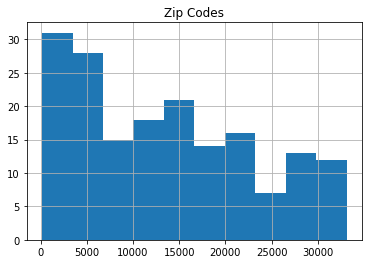

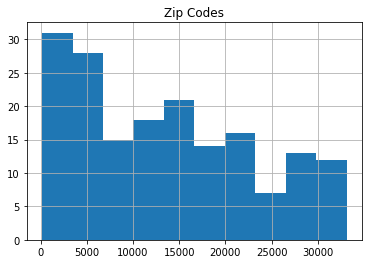

In [23]:
df2= df.dropna(subset=['Zip Codes'])
df.hist('Zip Codes')
df2.hist('Zip Codes')

用最高频率值来填补缺失值

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D183034E0>]],
      dtype=object)

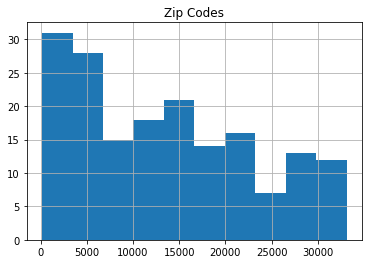

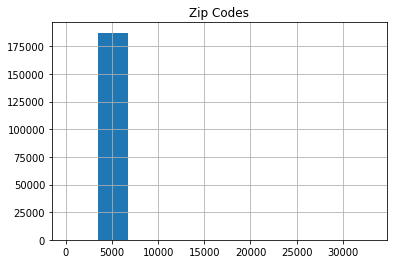

In [22]:
mode = df.mode()['Zip Codes'][0]
df2 = df.fillna({'Zip Codes': mode})
df.hist('Zip Codes')
df2.hist('Zip Codes')

通过属性的相关关系来填补缺失值

查看相关度，由图标可知，三个属性之间的关联度很多，所以考虑使用Location 1来填补Area Id

In [17]:
df.corr()

,Area Id,Priority,Zip Codes
Area Id,1.000000,-0.038554,0.023045
Priority,-0.038554,1.000000,0.010370
Zip Codes,0.023045,0.010370,1.000000


In [24]:
data_fill = pd.DataFrame(df, columns=['Area Id', 'Location 1'])
data_fill.head(Area Id)

,Area Id,Location 1
Agency,,
OP,2.0,"{'human_address': '{""address"": ""OLIVE ST"", ""ci..."
OP,2.0,"{'human_address': '{""address"": ""AV&MACARTHUR B..."
OP,1.0,"{'human_address': '{""address"": ""SYCAMORE ST"", ..."
OP,2.0,"{'human_address': '{""address"": ""AV&MACARTHUR B..."
OP,1.0,"{'human_address': '{""address"": ""ST&WOOD ST"", ""..."
OP,2.0,"{'human_address': '{""address"": ""DOUGLAS AV"", ""..."
OP,2.0,"{'human_address': '{""address"": ""AV&D ST"", ""cit..."
OP,1.0,"{'human_address': '{""address"": ""54TH ST"", ""cit..."
OP,2.0,"{'human_address': '{""address"": ""AV&BANCROFT AV..."


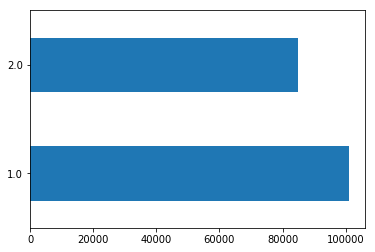

In [26]:
data_fill['Area Id'].value_counts().head(10).plot.barh()

In [27]:
dict = {}
for row in data_fill.iterrows():
    dict[row[1]['Location 1']] = row[1]['Area Id']
    
for row in data_fill.iterrows():
    try:
        region = dict[row[1]['Location 1']]
    except:
        continue
    row[1]['Area Id'] = region

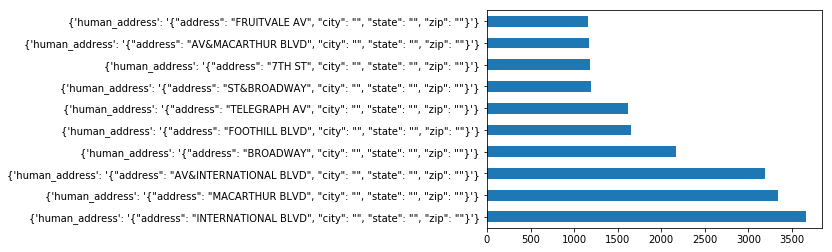

In [28]:
data_fill['Location 1'].value_counts().head(10).plot.barh()

通过数据对象之间的相似性来填补缺失值

In [ ]:
data_sim  = pd.DataFrame(df, columns=['Area Id', 'Location 1'])
data= {}
for row in data_sim.iterrows():
    if data.get(row[1]['Area Id'], None):
        if not pd.isnull(row[1]['Location 1']):
            data[row[1]['Area Id']][0] += row[1]['Location 1']
            data[row[1]['Area Id']][1] += 1
    else:
        if not pd.isnull(row[1]['Location 1']):
            data[row[1]['Area Id']] = [row[1]['Location 1'], 1]
for k in data.keys():
    data[k][0] = round(data[k][0] / data[k][1], 4)

for row in data_sim.iterrows():
    if pd.isnull(row[1]['Location 1']):
        try:
            row[1]['Location 1'] = data[row[1]['Area Id']][0]
        except:
            continue
